In [1]:
import numpy as np
import tensorflow as tf
import csv
import datetime 

from urllib.parse import urlencode
from urllib.request import urlretrieve
from IPython.display import Image

from astropy.io import fits
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.table import Table
from astropy.visualization import astropy_mpl_style

from matplotlib import pyplot as plt
plt.style.use(astropy_mpl_style)
%matplotlib inline

Filename: C:\Users\Jan\Desktop\hubble_data\HLADATA-proxima_centauri\hst_05132_0e_wfpc2_f675w_wf\ima.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     490   ()      
  1  SCI           1 ImageHDU       107   (550, 550)   float32   
  2  WHT           1 ImageHDU       108   (550, 550)   float32   
  3  CTX           1 ImageHDU       107   (550, 550)   int32   
<class 'astropy.io.fits.hdu.image.ImageHDU'>
(550, 550)


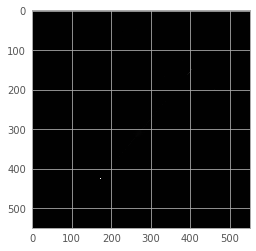

In [3]:
hdu_list = fits.open('C:\\Users\\Jan\\Desktop\\hubble_data\\HLADATA-proxima_centauri\\hst_05132_0e_wfpc2_f675w_wf\\ima.fits')
hdu_list.info()

print(type(hdu_list[1]))
img = hdu_list[1].data
print(img.shape)

plt.imshow(img,cmap='gray')
plt.show()

In [11]:
namestr = 'HCG 7'

hcg7_center = SkyCoord.from_name(namestr)
type(hcg7_center)

dir(hcg7_center)

['T',
 '__abstractmethods__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_apply',
 '_extra_frameattr_names',
 '_parse_inputs',
 '_sky_coord_frame',
 'altaz',
 'apply_space_motion',
 'barycentrictrueecliptic',
 'cache',
 'cartesian',
 'cirs',
 'copy',
 'data',
 'dec',
 'default_differential',
 'default_representation',
 'diagonal',
 'differential_type',
 'distance',
 'equinox',
 'fk4',
 'fk4noeterms',
 'fk5',
 'flatten',
 'frame',
 'frame_attributes',
 'frame_specific_representation_info',
 'from_name',
 'fr

In [5]:
print(hcg7_center.ra, hcg7_center.dec)
print(hcg7_center.ra.hour, hcg7_center.dec)

print(hcg7_center.ra.deg)
print(hcg7_center.dec.deg)

9d48m58.5s 0d53m17.016s
0.6544166666666668 0d53m17.016s
9.81625
0.88806


In [6]:
store_path = 'C:\\Users\\Jan\\Desktop\\Pictures\\astropy\\'+namestr.replace(' ','_')+'_'+str(datetime.datetime.now()).replace(' ','_').replace(':','_').replace('.','_')+'.jpeg'
baseurl = 'http://skyservice.pha.jhu.edu/DR12/ImgCutout/getjpeg.aspx'

img_size = 12*u.arcmin
img_pixels = 500


query = urlencode(dict(ra=hcg7_center.ra.deg,
                       dec=hcg7_center.dec.deg,
                       width=img_pixels,height=img_pixels,
                       scale=img_size.to(u.arcsec).value/img_pixels))
fullurl = baseurl + '?' + query

urlretrieve(fullurl,store_path)

('C:\\Users\\Jan\\Desktop\\Pictures\\astropy\\HCG_7_2018-09-08_21_51_35_896530.jpeg',
 <http.client.HTTPMessage at 0x1c0cb476d68>)

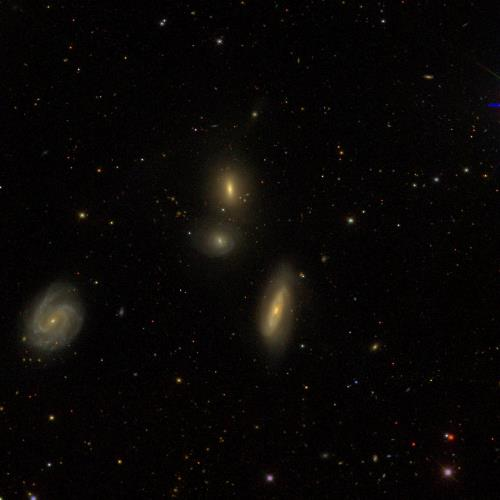

In [7]:
Image(store_path)

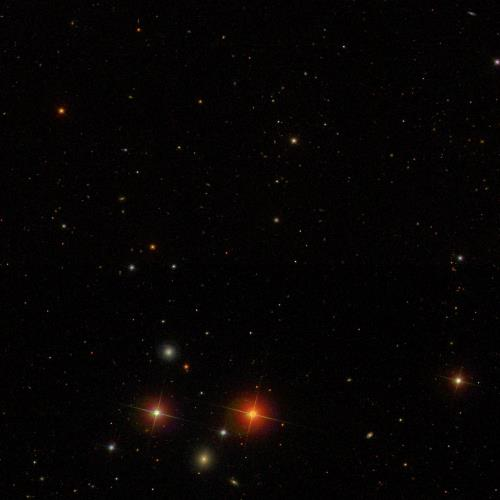

In [114]:
store_path = 'C:\\Users\\Jan\\Desktop\\Pictures\\astropy\\'+namestr.replace(' ','_')+'_'+str(datetime.datetime.now()).replace(' ','_').replace(':','_').replace('.','_')+'.jpeg'
baseurl = 'http://skyservice.pha.jhu.edu/DR12/ImgCutout/getjpeg.aspx'

img_size = 12*u.arcmin
img_pixels = 500

coord = SkyCoord(ra='0h0m0s',dec='0d0m0s')

query = urlencode(dict(ra=coord.ra.deg,dec=coord.dec.deg,
                       width=img_pixels,height=img_pixels,
                       scale=img_size.to(u.arcsec).value/img_pixels))
fullurl = baseurl+'?'+query

urlretrieve(fullurl,store_path)

Image(store_path)

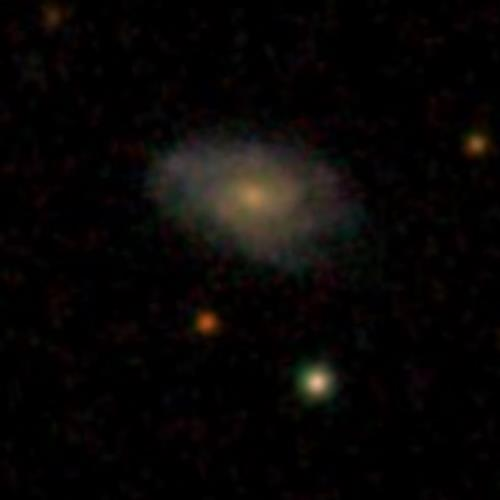

In [174]:
store_path = 'C:\\Users\\Jan\\Desktop\\Pictures\\astropy\\'+namestr.replace(' ','_')+'_'+str(datetime.datetime.now()).replace(' ','_').replace(':','_').replace('.','_')+'.jpeg'
baseurl = 'http://skyservice.pha.jhu.edu/DR12/ImgCutout/getjpeg.aspx'

img_size = 1*u.arcmin
img_pixels = 500

#coord = SkyCoord(ra='0h52m45s',dec='0d0m0s')
#coord = SkyCoord(ra=0*u.deg,dec=-0.07*u.deg)
coord = SkyCoord(ra=25.237*u.deg,dec=25.483*u.deg)

query = urlencode(dict(ra=coord.ra.deg,dec=coord.dec.deg,
                       width=img_pixels,height=img_pixels,
                       scale=img_size.to(u.arcsec).value/img_pixels))
fullurl = baseurl+'?'+query

urlretrieve(fullurl,store_path)

Image(store_path)